## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

In [4]:
data = pd.read_csv('german.csv', sep=';')
# print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

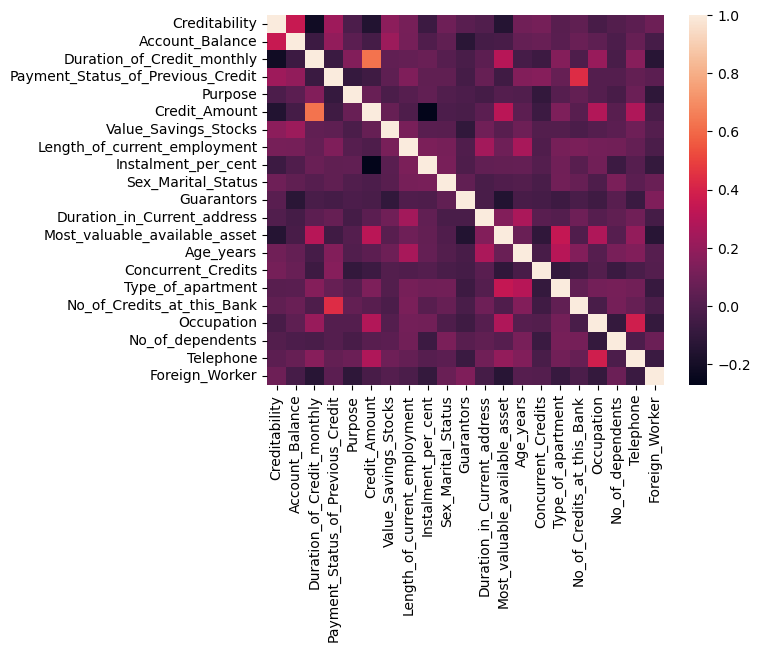

In [27]:
sns.heatmap(data.corr())

In [30]:
data.Creditability

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64

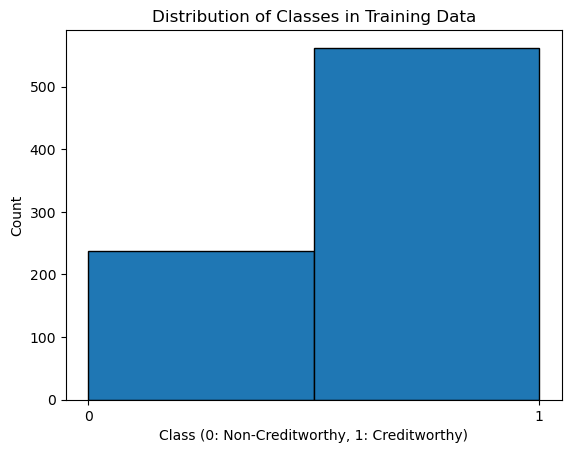

In [7]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [198]:
# Обучение Random Forest
params_rf = {
    'n_estimators':25,
    'criterion': 'gini',
    'min_samples_split':9,
    'n_jobs':-1,
    'min_samples_leaf':4,
    'random_state':42,
    'max_depth':9
}

rf_model = RandomForestClassifier(**params_rf)
rf_model.fit(X_train, y_train)
# search_rf = GridSearchCV(rf_model,param_grid=params_rf,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42))
# search_rf.fit(X_train,y_train)
# search_rf_pred = search_rf.best_estimator_.predict_proba(X_test)[:,1]
# print(search_rf.best_params_)
# print(f"ROC AUC: {roc_auc_score(y_test, search_rf_pred):.2f}")

# # # Прогноз на тестовых данных
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# # Обучение Gradient Boosting
params_gb = {
    'n_estimators':20,
    'max_depth':3,
    'random_state':42,
    'learning_rate':0.19,
    'min_samples_split':18,
    'min_samples_leaf':9
}
gb_model = GradientBoostingClassifier(**params_gb)
gb_model.fit(X_train, y_train)


# search_gb = GridSearchCV(gb_model,param_grid=params_gb,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42))
# search_gb.fit(X_train,y_train)
# search_gb_pred = search_gb.best_estimator_.predict_proba(X_test)[:,1]
# print(search_gb.best_params_)
# print(f"ROC AUC: {roc_auc_score(y_test, search_gb_pred):.2f}")

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:,1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.81
Accuracy: 0.74
Precision: 0.76
Recall: 0.92

Gradient Boosting метрики:
ROC AUC: 0.79
Accuracy: 0.77
Precision: 0.79
Recall: 0.91


In [56]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(5,),activation='relu',learning_rate='adaptive', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:,1]
# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.76
Accuracy: 0.69
Precision: 0.69
Recall: 1.00


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели